# Simple Linear Regression from scratch


In [31]:
# load required library
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np
# load dataset
X, y = load_diabetes(return_X_y=True)
X = X[:, 2]

**Part I - Plot data** 

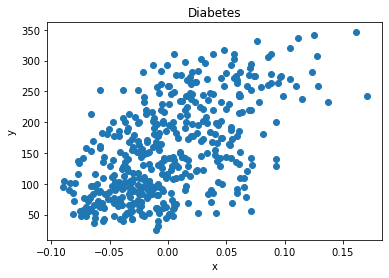

In [32]:
# draw the raw data plot
plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Diabetes")
plt.show()

**Part II - Define loss function** 

Initialize theta

In [33]:
# theta is randomly initialized
# The dimension of theta is n+1, where n is the number of features (dimension of the input), since it also contains the bias
# Here, input dimension = 1, so dim(theta) = 2 
import random

def gen_random(a: int, b: int, round_ndigits=None):
	"""Return a random float between a and b

	Args:
		a (int): Low boundary
		b (int): High boundary
		round_ndigits (int, optional): The number of digits to round. Defaults to None.

	Returns:
		float: A random number between a and b
	"""
	res = random.random() * (b - a) + a 
	return res if round_ndigits == None else round(res, round_ndigits)

# We initialize the bias and the only weight as a float between 0 and 1 (arbitrary)
theta = [gen_random(0, 1, 2), gen_random(0, 1, 2)]
theta

[0.82, 0.18]

Define loss function (mean squared loss)

In [34]:
def mean_squared_error(y_predictions: list, y: list):
	"""Mean Squared Error

	Args:
		y_predictions (list): The list of predictions
		y (list): The list of true values

	Returns:
		float: The Mean Squared Error between y and y_predictions
	"""
	assert len(y) == len(y_predictions)

	squared_error = 0

	for i in range(len(y)):
		squared_error += (y[i] - y_predictions[i])**2

	return squared_error / len(y)

In [35]:
def predict(theta: tuple, x: list):
	"""Predict the values y given the inputs x

	Args:
		theta (tuple): (weight, bias) of the model
		x (list): list of inputs

	Returns:
		list: The list of predictions for each x[i]
	"""
	return theta[1] + theta[0] * x

In [36]:
y_predictions = predict(theta, X)
y_predictions

array([0.23059089, 0.13779127, 0.21644999, 0.17049209, 0.15016455,
       0.14662933, 0.14132649, 0.17844634, 0.23059089, 0.21203097,
       0.11127709, 0.19435485, 0.15635119, 0.17844634, 0.15900261,
       0.16518925, 0.21468238, 0.18993582, 0.17137589, 0.16518925,
       0.13337224, 0.16165403, 0.17667873, 0.22970708, 0.20937955,
       0.16960828, 0.11657993, 0.22882328, 0.16253784, 0.17491112,
       0.21644999, 0.12630179, 0.28273544, 0.13867508, 0.1280694 ,
       0.15458358, 0.19877388, 0.18905201, 0.23854514, 0.19170343,
       0.17314351, 0.12453418, 0.17137589, 0.16077022, 0.23589372,
       0.15104836, 0.17049209, 0.12011515, 0.14574552, 0.19170343,
       0.17402731, 0.19347104, 0.1722597 , 0.16695686, 0.20054149,
       0.13955888, 0.21379858, 0.1280694 , 0.1271856 , 0.15900261,
       0.17667873, 0.18374918, 0.17402731, 0.14928075, 0.15900261,
       0.15988642, 0.16518925, 0.16784067, 0.15546739, 0.1422103 ,
       0.12276657, 0.20761194, 0.17667873, 0.16342164, 0.18198

Initial mse value

In [37]:
mean_squared_error(y_predictions, y)

29016.22497595695

**Part III - Gradient descent implementation** 

In [38]:
# The number of epochs and the learning rate are values found empirically, by observing the loss over the epochs and, if possible, observing the regression model (how it fits the data)

epochs = 1000
learning_rate = 0.7


def gradient_descent(theta: tuple, x: list, y: list, epochs: int, learning_rate: float):
	"""Gradient descent adapted for Mean Squared Loss and a unique input feature

	Args:
		theta (list): (weight, bias)
		x (list): inputs
		y (list): outputs
		epochs (int): The number of epochs
		learning_rate (float): The learning rate

	Returns:
		updated bias, updated weight, [(weight, bias) over the epochs], [mse over the epochs]
	"""
	bias = theta[1]
	w = theta[0]

	# res = [(weight, bias) over the epochs]
	# mse = [mse over the epochs] (cost history)
	res, mse = [], []

	for epoch in range(epochs):
		# Get predictions
		y_pred = predict([w, bias], x)
		diff = y - y_pred # Vector containing the difference between y_i and y_pred_i

		# Update bias and weight using the gradient descent (question 8)
		w -= learning_rate * (-2 * x.dot(diff).sum() / len(x))
		bias -= learning_rate * (-2 * diff.sum() / len(x))

		res.append((w, bias))
		mse.append(mean_squared_error(predict([w, bias], x), y))

	return bias, w, res, mse


bias, w, res, mse = gradient_descent(theta, X, y, epochs, learning_rate)
print(f"(weight, bias) = ({w}, {bias})")
print(f"Last mse: {mse[-1]}")

(weight, bias) = (909.6874167618686, 152.13348416289665)
Last mse: 3894.0309996526917


**Part IV - Plot loss function per epochs** 

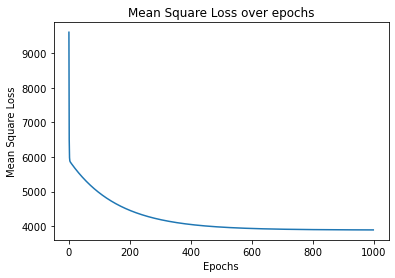

In [39]:
plt.plot([i for i in range(epochs)], mse)
plt.xlabel("Epochs")
plt.ylabel("Mean Square Loss")
plt.title("Mean Square Loss over epochs")
plt.show()

**Part V - Plot Linear Regression** 

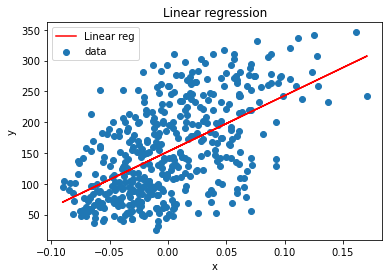

In [40]:
y_pred = predict([w, bias], X)
plt.scatter(X, y, label="data")
plt.plot(X, y_pred, color="red", label="Linear reg")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear regression")
plt.legend()
plt.show()